In [10]:
#Part C TL and ResNet50
train_dir = 'dogs-vs-cat-small/train/'
test_dir = 'dogs-vs-cat-small/test/'
validation_dir ='dogs-vs-cat-small/validation/'

import keras
#Xception kernel


conv_base = keras.applications.ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

94773248/94765736 [==============================] - 59s 1us/step


In [13]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 5, 5, 2048))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i+=1
        if i * batch_size >= sample_count:
            break
        return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
train_features = np.reshape(train_features, (2000,5*5*2048))
validation_features = np.reshape(validation_features, (1000,5*5*2048))
test_features = np.reshape(test_features, (1000,5*5*2048))




In [16]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=5* 5 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 15s 148ms/step - loss: 0.6928 - acc: 0.9925 - val_loss: 0.6923 - val_acc: 0.9900
Epoch 2/30
100/100 [==============================] - 14s 145ms/step - loss: 0.6886 - acc: 0.9960 - val_loss: 0.6841 - val_acc: 0.9900
Epoch 3/30
100/100 [==============================] - 15s 146ms/step - loss: 0.6829 - acc: 0.9950 - val_loss: 0.6793 - val_acc: 0.9900
Epoch 4/30
100/100 [==============================] - 15s 153ms/step - loss: 0.6758 - acc: 0.9960 - val_loss: 0.6807 - val_acc: 0.9900
Epoch 5/30
100/100 [==============================] - 15s 149ms/step - loss: 0.6706 - acc: 0.9965 - val_loss: 0.6723 - val_acc: 0.9900
Epoch 6/30
100/100 [==============================] - 14s 144ms/step - loss: 0.6693 - acc: 0.9930 - val_loss: 0.6620 - val_acc: 0.9910
Epoch 7/30
100/100 [==============================] - 15s 150ms/step - loss: 0.6589 - acc: 0.9965 - val_loss: 0.6572 - val_acc: 0.9900
Epoch 8/30
100/100 [==============================] - 1

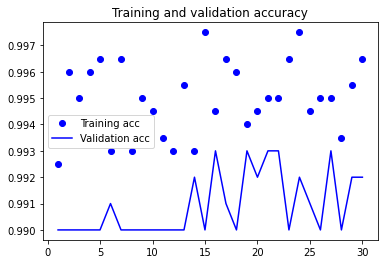

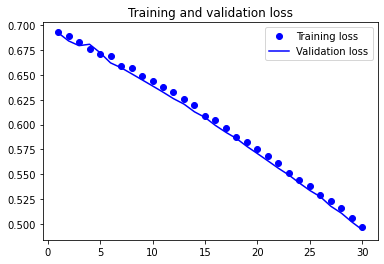

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()